<a href="https://colab.research.google.com/github/Ouzr0107/pytorch_ex/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
from torchmetrics.functional import accuracy
# Check for GPU
!nvidia-smi

Mon Sep 15 19:45:17 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 580.88                 Driver Version: 580.88         CUDA Version: 13.0     |
+-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 3060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   55C    P0             33W /  131W |    3520MiB /   6144MiB |     93%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

2.8.0+cu126


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

In [ ]:
摄影，制造，安保。

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
过拟合是指机器学习模型在训练集上表现极好，几乎能完美“记住”所有数据，但却在新的、未见过的测试集或真实数据上表现很差的现象。

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
模型选择：在给定数据的情况下，在一组候选模型中选定最优模型的过程。
交叉验证：一种统计学上将数据样本切割成较小子集的实用方法。
提前停止：一种在使用诸如梯度下降之类的迭代优化方法时，可对抗过拟合的正则化方法。

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

train_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

100.0%
100.0%
100.0%
100.0%


## 6. Visualize at least 5 different samples of the MNIST training dataset.

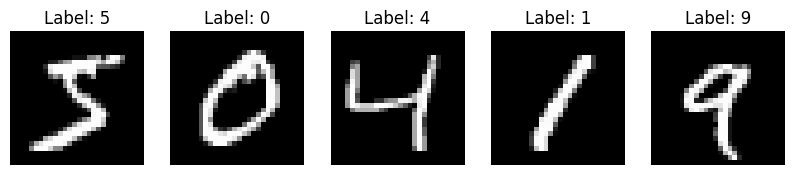

In [10]:
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(train_data[i][0].squeeze(), cmap='gray')
    plt.title(f'Label: {train_data[i][1]}')
    plt.axis('off')
plt.show()

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(f'Length of train dataloader: {len(train_dataloader)} batches')
print(f'Length of test dataloader: {len(test_dataloader)} batches')

Length of train dataloader: 1875 batches
Length of test dataloader: 313 batches


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [13]:
import torch.nn as nn


class MNISTModelV0(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """

    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,  # how big is the square that's going over the image?
                      stride=1,  # default
                      padding=1),
            # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)  # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our input data.
            nn.Linear(in_features=hidden_units * 7 * 7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x


model_2 = MNISTModelV0(input_shape=1,
                       hidden_units=10,
                       output_shape=len(train_data.classes)).to(device)
model_2

MNISTModelV0(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [28]:
from tqdm.auto import tqdm

import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    # Note: you need the "raw" GitHub URL for this to work
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import accuracy_fn

epochs = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)


def train_step(model: torch.nn.Module, dataloader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer, accuracy_fn, device: torch.device):
    train_loss, train_acc = 0, 0
    model.to(device)

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)

    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch + 1}\n-------------------------------")
    train_step(model=model_2,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

train_time_end_model_2 = timer()
total_train_time_model_2 = train_time_end_model_2 - train_time_start_model_2
print(f"Total training time: {total_train_time_model_2:.3f}")

helper_functions.py already exists, skipping download


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1
-------------------------------


 20%|██        | 1/5 [00:08<00:32,  8.07s/it]

Train loss: 0.01809 | Train accuracy: 99.40%
Epoch: 2
-------------------------------


 40%|████      | 2/5 [00:14<00:21,  7.26s/it]

Train loss: 0.01788 | Train accuracy: 99.41%
Epoch: 3
-------------------------------


 60%|██████    | 3/5 [00:21<00:13,  6.99s/it]

Train loss: 0.01649 | Train accuracy: 99.45%
Epoch: 4
-------------------------------


 80%|████████  | 4/5 [00:29<00:07,  7.26s/it]

Train loss: 0.01651 | Train accuracy: 99.49%
Epoch: 5
-------------------------------


100%|██████████| 5/5 [00:36<00:00,  7.34s/it]

Train loss: 0.01577 | Train accuracy: 99.46%
Total training time: 1852.904


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

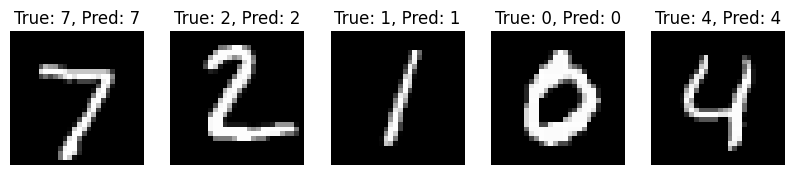

In [19]:
plt.figure(figsize=(10, 10))

for i, sample in enumerate(test_data):
    if i == 5:
        break
    X, y = sample[0].unsqueeze(0).to(device), sample[1]
    model_2.eval()
    with torch.inference_mode():
        pred = model_2(X)
        pred_label = pred.argmax(dim=1).item()

    plt.subplot(1, 5, i + 1)
    plt.imshow(sample[0].squeeze(), cmap='gray')
    plt.title(f'True: {y}, Pred: {pred_label}')
    plt.axis('off')

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

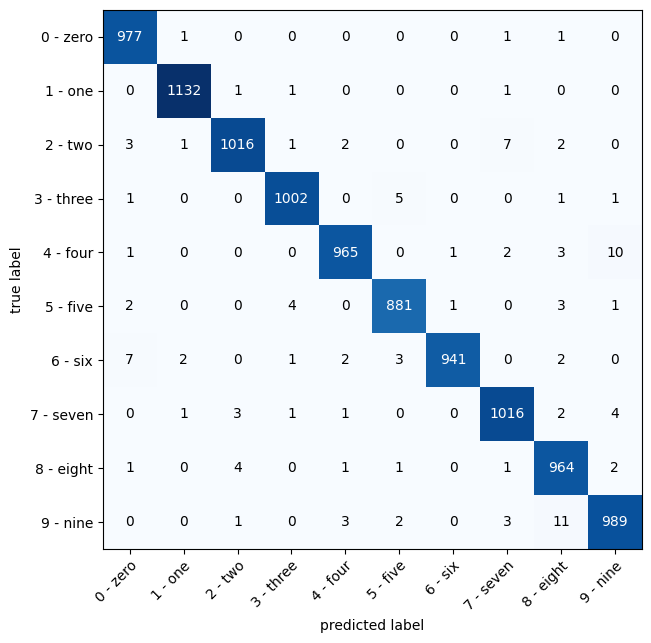

In [26]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes=len(train_data.classes), task="multiclass").to(device)

model_2.eval()
with torch.inference_mode():
    y_preds = []
    y_trues = []
    for X, y in test_dataloader:
        X, y = X.to(device), y.to(device)
        preds = model_2(X).argmax(dim=1)
        y_preds.append(preds)
        y_trues.append(y)

    y_preds = torch.cat(y_preds)
    y_trues = torch.cat(y_trues)

    confmat_tensor = confmat(y_preds, y_trues).cpu()

fig, ax = plot_confusion_matrix(conf_mat=confmat_tensor.numpy(), class_names=train_data.classes, figsize=(10, 7))
plt.show()


## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?